# Modelling fertility levels in Nigeria using Generalized Poisson regression-based approach 
Link paper: https://www.sciencedirect.com/science/article/pii/S2468227620302325 <br>
Link data: https://github.com/thanhcong1321/Project_GLM/tree/main/Project_glm/data <br>
Source code: https://github.com/thanhcong1321/Project_GLM/blob/main/Project_glm/Modeling.ipynb

Nguyễn Thành Công, Nguyễn Thị Kim Duyên

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.factorplots import interaction_plot
sns.set_theme(style="ticks", color_codes=True)
from itertools import combinations

## EDA - Xử lý dữ liệu

In [2]:
df = pd.read_excel("data/1-s2.0-S2352340921003619-mmc1.xlsx", index_col=None)
df.drop("PERWEIGHT", axis=1, inplace=True)
df.head(5)

,Totalchildreneverborn,Urban,Region,Pregnant,Religion,Ageofhouseholdhead,Ageatfirstmarriage,Pregnancyterminated,Ageatfirstbirth,Currentlyworking,Womanoccupation,Fertilitypreferences,Childdesire,Kidsex,Kidalive,Kidtwin,Education
0,9,2,1,0,2.0,50.0,22.0,2.0,23,10.0,10.0,2.0,2.0,1,1,1,1
1,4,2,1,0,2.0,60.0,30.0,2.0,35,10.0,10.0,1.0,1.0,1,0,1,1
2,6,2,1,1,2.0,40.0,19.0,1.0,20,10.0,10.0,1.0,1.0,2,1,1,1
3,3,2,1,0,2.0,30.0,18.0,1.0,19,10.0,10.0,1.0,1.0,2,1,1,1
4,3,2,1,0,2.0,30.0,18.0,1.0,19,10.0,10.0,1.0,1.0,1,1,1,1


In [3]:
# Rút ngắn tên các cột để dễ sử dụng
df.rename(columns={"Totalchildreneverborn":"Cheb", 
                   "Ageofhouseholdhead":"Hhha","Ageatfirstmarriage":"Age1stmar", 
                   "Pregnancyterminated":"Pregterm","Ageatfirstbirth":"Age1stbirth",
                   "Currentlyworking":"Curwor","Womanoccupation":"Woc",
                   "Fertilitypreferences":"Fp"}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31482 entries, 0 to 31481
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cheb         31482 non-null  int64  
 1   Urban        31482 non-null  int64  
 2   Region       31482 non-null  int64  
 3   Pregnant     31482 non-null  int64  
 4   Religion     31322 non-null  float64
 5   Hhha         31424 non-null  float64
 6   Age1stmar    30878 non-null  float64
 7   Pregterm     31458 non-null  float64
 8   Age1stbirth  31482 non-null  int64  
 9   Curwor       31346 non-null  float64
 10  Woc          31328 non-null  float64
 11  Fp           31311 non-null  float64
 12  Childdesire  31155 non-null  float64
 13  Kidsex       31482 non-null  int64  
 14  Kidalive     31482 non-null  int64  
 15  Kidtwin      31482 non-null  int64  
 16  Education    31482 non-null  int64  
dtypes: float64(8), int64(9)
memory usage: 4.1 MB


In [5]:
# Gán lại giá trị ban đầu cho các biến
df.replace({"Urban":{1:"Urban", 
                     2:"Rural"},
           "Region":{1:"North Central", 
                     2:"North East", 
                     3:"North West", 
                     4:"South East", 
                     5:"South South", 
                     6:"South West"},
           "Pregnant":{0:"No",
                       1:"Yes"},
           "Religion":{1:"Muslim/Islam", 
                       2:"Christian/Others"},
           "Pregterm":{1:"No", 
                       2:"Yes"},
           "Curwor":{0:"No", 
                     10:"Yes"},
           "Woc":{0:"Not currently working", 
                  10:"Sales worker", 
                  22:"Professional worker/Others"},
           "Fp":{1:"Have another", 
                 2:"No more/Others"},
           "Childdesire":{1:"Wanted then", 
                          2:"Wanted later/No more"},
           "Kidsex":{1:"Female", 
                     2:"Male"},
           "Kidalive":{0:"No", 
                       1:"Yes"},
           "Kidtwin":{1:"Single birth", 
                      2:"Multiple birth"},
           "Education":{0:"No education", 
                        1:"Primary", 
                        2:"Secondary/Higher"}},
          inplace=True)


In [6]:
# Ép kiểu dữ liệu về catergory tương tự như factor trong R
cols = ['Urban', 'Region', 'Pregnant', 'Religion',
       'Pregterm', 'Curwor', 'Woc', 'Fp', 'Childdesire',
       'Kidsex', 'Kidalive', 'Kidtwin', 'Education']
df[cols] = df[cols].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31482 entries, 0 to 31481
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Cheb         31482 non-null  int64   
 1   Urban        31482 non-null  category
 2   Region       31482 non-null  category
 3   Pregnant     31482 non-null  category
 4   Religion     31322 non-null  category
 5   Hhha         31424 non-null  float64 
 6   Age1stmar    30878 non-null  float64 
 7   Pregterm     31458 non-null  category
 8   Age1stbirth  31482 non-null  int64   
 9   Curwor       31346 non-null  category
 10  Woc          31328 non-null  category
 11  Fp           31311 non-null  category
 12  Childdesire  31155 non-null  category
 13  Kidsex       31482 non-null  category
 14  Kidalive     31482 non-null  category
 15  Kidtwin      31482 non-null  category
 16  Education    31482 non-null  category
dtypes: category(13), float64(2), int64(2)
memory usage: 1.4 MB


Text(0, 0.5, 'Frequency')

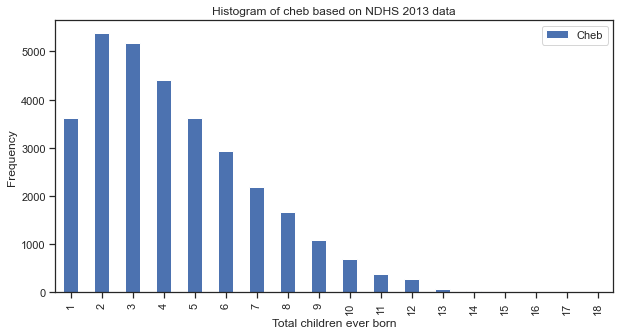

In [8]:
# hítogram of Totalchildren ever born
frequency = pd.DataFrame(df.Cheb.value_counts())
frequency.sort_index(inplace=True)
ax = frequency.plot(kind='bar', title='Histogram of cheb based on NDHS 2013 data', figsize=(10, 5))
ax.set_xlabel("Total children ever born")
ax.set_ylabel("Frequency")

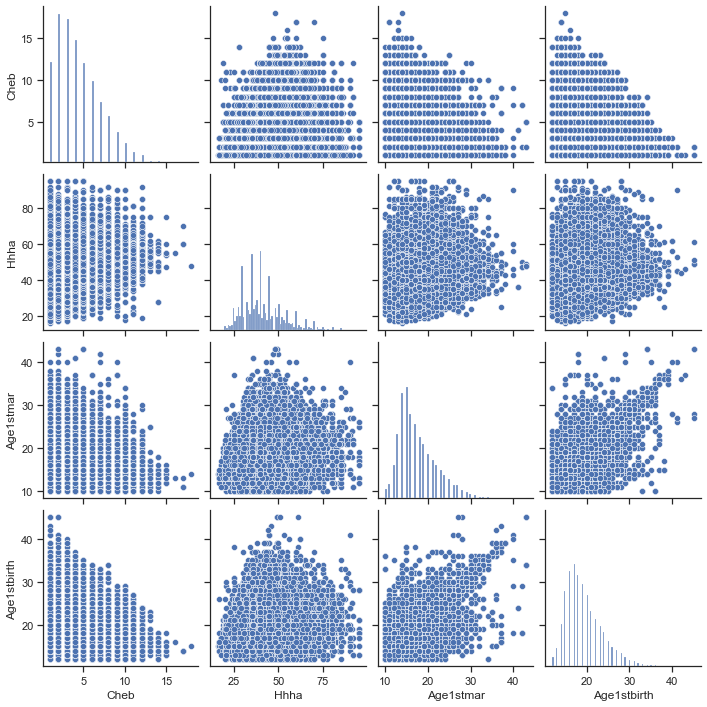

In [9]:
sns.pairplot(df)

In [10]:
df.describe(include="all")

,Cheb,Urban,Region,Pregnant,Religion,Hhha,Age1stmar,Pregterm,Age1stbirth,Curwor,Woc,Fp,Childdesire,Kidsex,Kidalive,Kidtwin,Education
count,31482.000000,31482,31482,31482,31322,31424.000000,30878.000000,31458,31482.000000,31346,31328,31311,31155,31482,31482,31482,31482
unique,NaN,2,6,2,2,NaN,NaN,2,NaN,2,3,2,2,2,2,2,3
top,NaN,Rural,North West,No,Muslim/Islam,NaN,NaN,No,NaN,Yes,Professional worker/Others,Have another,Wanted then,Female,Yes,Single birth,No education
freq,NaN,21131,9906,27019,18354,NaN,NaN,28038,NaN,21697,11964,23832,28370,15965,28596,30384,14762
mean,4.353218,NaN,NaN,NaN,NaN,41.408573,17.618887,NaN,19.364240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.605069,NaN,NaN,NaN,NaN,12.034280,4.450056,NaN,4.255649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,16.000000,10.000000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,NaN,NaN,NaN,NaN,33.000000,14.000000,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,NaN,NaN,NaN,NaN,40.000000,17.000000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.000000,NaN,NaN,NaN,NaN,48.000000,20.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


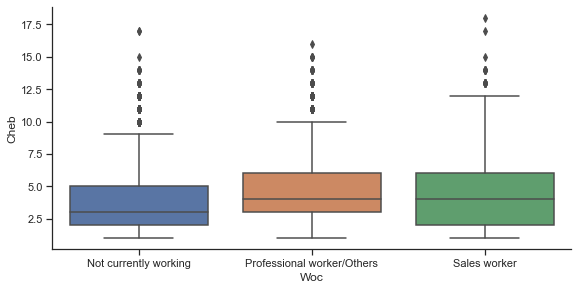

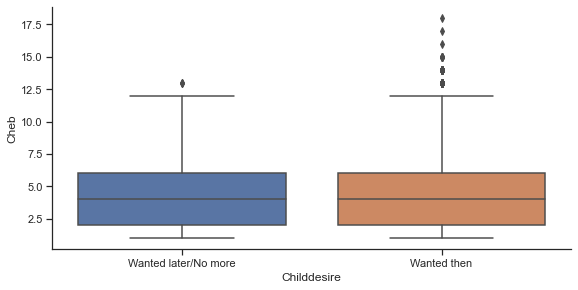

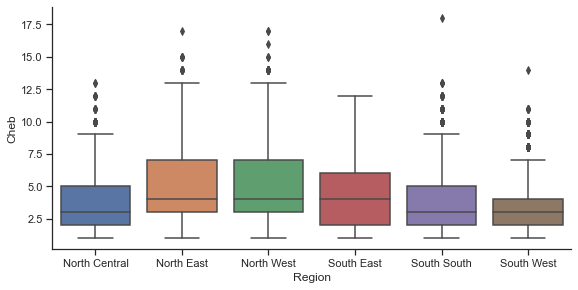

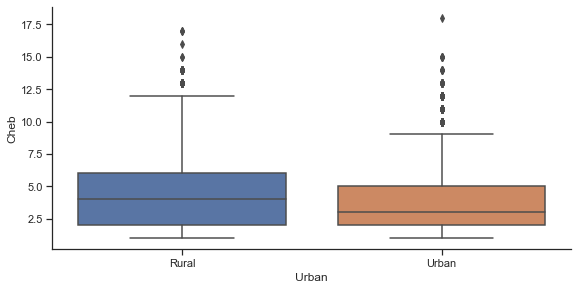

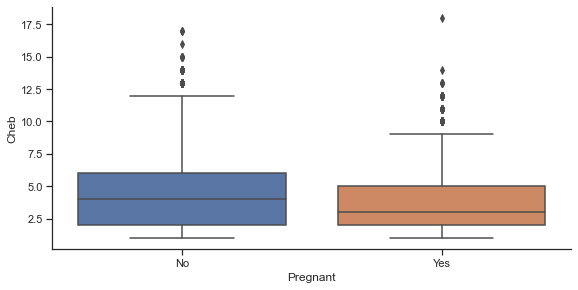

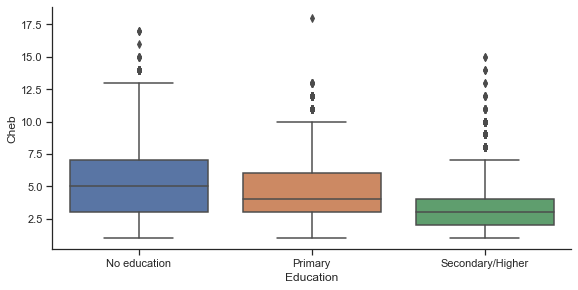

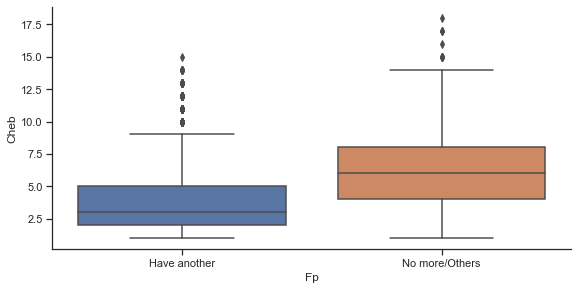

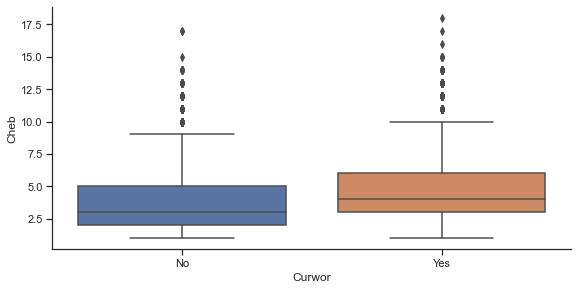

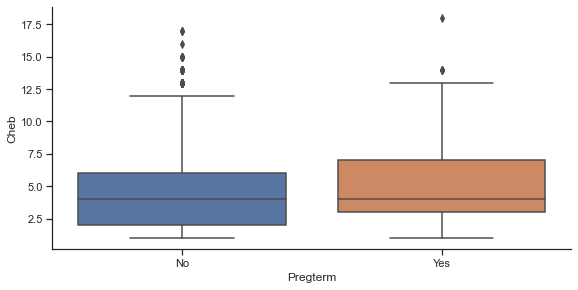

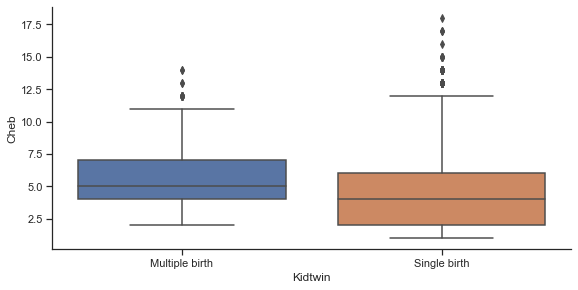

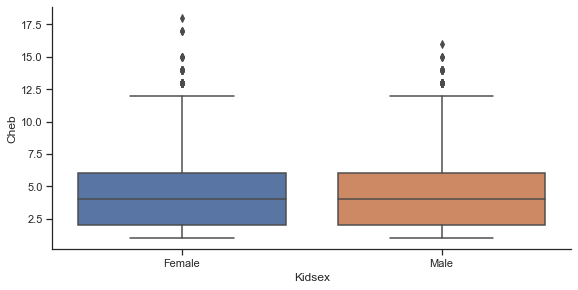

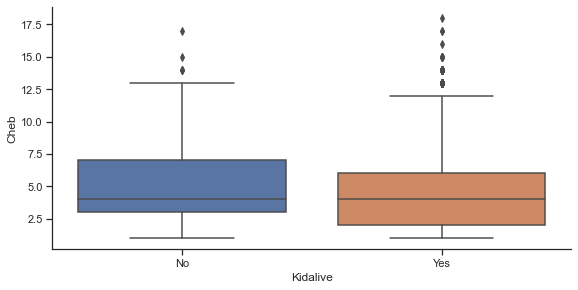

In [11]:
# Catergory
sns.catplot(data=df, kind="box", x='Woc', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Childdesire', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Region', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Urban', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Pregnant', y='Cheb', height=4, aspect=2)
sns.catplot(data=df,kind="box", x='Education', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Fp', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Curwor', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Pregterm', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Kidtwin', y='Cheb', height=4, aspect=2)
sns.catplot(data=df,kind="box", x='Kidsex', y='Cheb', height=4, aspect=2)
sns.catplot(data=df,kind="box", x='Kidalive', y='Cheb', height=4, aspect=2)

In [12]:
df.columns

Index(['Cheb', 'Urban', 'Region', 'Pregnant', 'Religion', 'Hhha', 'Age1stmar',
       'Pregterm', 'Age1stbirth', 'Curwor', 'Woc', 'Fp', 'Childdesire',
       'Kidsex', 'Kidalive', 'Kidtwin', 'Education'],
      dtype='object')

## Xây dựng mô hình Generalized Poisson regression

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Building model

In [36]:
# Dianostic model
def diagnostic(model_fit):
    model_fitted_y = model_fit.fittedvalues
    model_residuals = model_fit.resid_pearson
    model_norm_residuals = model_fit.get_influence().resid_studentized
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    model_abs_resid = np.abs(model_residuals)
    model_leverage = model_fit.get_influence().hat_matrix_diag
    model_cooks = model_fit.get_influence().cooks_distance[0]
    
    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, 
                              lowess=True,
                              scatter_kws={'alpha': 0.5},
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');
    
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                   xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                       model_norm_residuals[i]));
        
    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));
        
    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

In [17]:
df.columns

Index(['Cheb', 'Urban', 'Region', 'Pregnant', 'Religion', 'Hhha', 'Age1stmar',
       'Pregterm', 'Age1stbirth', 'Curwor', 'Woc', 'Fp', 'Childdesire',
       'Kidsex', 'Kidalive', 'Kidtwin', 'Education'],
      dtype='object')

In [21]:
# Vét cạn toàn bộ các model có thể có (chưa tính kết hợp các features với nhau)
features = ['Urban', 'Region', 'Pregnant', 'Religion', 'Hhha', 'Age1stmar',
       'Pregterm', 'Age1stbirth', 'Curwor', 'Woc', 'Fp', 'Childdesire',
       'Kidsex', 'Kidalive', 'Kidtwin', 'Education']

models = []
formulas = []
cols = ["model", "deviance", "pearson_chi2", "llf", "df_resid", "AIC", "Chisq"]
for i in range(2, len(features)+1):
    combs = combinations(features, i)
    for i in combs:
        formulas.append('Cheb ~ ' + " + ".join(i))
        
for i in tqdm(range(len(formulas))):
    model = smf.glm(formula=formulas[i], data=df, family=sm.families.Poisson())
    result = model.fit()
    chisq = 1 - stats.chi2.cdf(result.deviance, result.df_resid)
    if chisq > 0.05:
        models.append([formulas[i], result.deviance,result.pearson_chi2,result.llf,result.df_resid,result.aic, chisq])
    
models = pd.DataFrame(models,columns = cols)

100%|██████████████████████████████████████████████████████████████████████████| 65519/65519 [3:41:57<00:00,  4.92it/s]


## Lấy Top 10 model có Chisq và AIC tốt nhất

In [27]:
models = models.sort_values("AIC").reset_index(drop=True)
models.head(10)

,model,deviance,pearson_chi2,llf,df_resid,AIC,Chisq
0,Cheb ~ Region + Pregnant + Religion + Hhha + A...,27172.643664,26727.277691,-61223.144026,29876,122488.288052,1.0
1,Cheb ~ Region + Pregnant + Religion + Hhha + A...,27170.767893,26724.811040,-61222.206141,29875,122488.412281,1.0
2,Cheb ~ Urban + Region + Pregnant + Religion + ...,27171.939424,26722.555030,-61222.791906,29875,122489.583812,1.0
3,Cheb ~ Urban + Region + Pregnant + Religion + ...,27170.062595,26720.085707,-61221.853491,29874,122489.706983,1.0
4,Cheb ~ Region + Pregnant + Religion + Hhha + A...,27250.631625,26825.959218,-61262.138006,29877,122564.276013,1.0
5,Cheb ~ Urban + Region + Pregnant + Religion + ...,27249.154214,26818.384619,-61261.399301,29876,122564.798602,1.0
6,Cheb ~ Region + Pregnant + Religion + Hhha + A...,27249.394665,26824.273154,-61261.519527,29876,122565.039053,1.0
7,Cheb ~ Urban + Region + Pregnant + Religion + ...,27247.912045,26816.683971,-61260.778216,29875,122565.556432,1.0
8,Cheb ~ Region + Pregnant + Religion + Hhha + A...,27255.262379,26800.225303,-61298.431624,29901,122636.863247,1.0
9,Cheb ~ Region + Pregnant + Religion + Hhha + A...,27253.442735,26797.876266,-61297.521802,29900,122637.043603,1.0


In [88]:
models.model[0]

'Cheb ~ Region + Pregnant + Religion + Hhha + Age1stmar + Pregterm + Age1stbirth + Curwor + Woc + Fp + Childdesire + Kidalive + Kidtwin + Education'

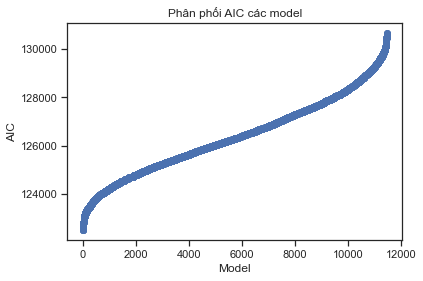

In [41]:
plt.scatter(range(models.shape[0]),models['AIC'])
plt.title("Phân phối AIC của các model")
plt.xlabel("Model")
plt.ylabel("AIC")
plt.show()

## Lựa chọn mô hình
So sánh model đã được thực hiện trong paper và model thu được sau khi thực hiện vét cạn

#### Model trong paper

In [43]:
# Model theo paper
fml_pp = 'Cheb ~ Urban + Region + Religion + Hhha + Age1stmar + Pregterm + Age1stbirth + Curwor + Woc + Fp + Childdesire + Kidsex + Kidalive + Kidtwin + Education + Age1stmar*Fp + Region*Fp + Pregterm*Woc + Fp*Kidtwin + Childdesire*Education + Kidalive*Education'
model_pp = smf.glm(formula=fml_pp, data=df, family=sm.families.Poisson())
result_pp = model_pp.fit()
print(result_pp.summary())
# Độ phù hợp của mô hình
print("Chisq: ", 1 - stats.chi2.cdf(result_pp.deviance, result_pp.df_resid))
print("AIC: ", result_pp.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Cheb   No. Observations:                29897
Model:                            GLM   Df Residuals:                    29862
Model Family:                 Poisson   Df Model:                           34
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61227.
Date:                Sat, 10 Jul 2021   Deviance:                       27180.
Time:                        05:08:48   Pearson chi2:                 2.67e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

**Kết quả chạy model này không giống như trong paper**

***AIC của mô hình trong paper cao hơn model 1***
-> Lựa chọn model 1: 'Cheb ~ Region + Pregnant + Religion + Hhha + Age1stmar + Pregterm + Age1stbirth + Curwor + Woc + Fp + Childdesire + Kidalive + Kidtwin + Education'

#### Model 0

In [76]:
# Model 0: 'Cheb ~ Region + Pregnant + Religion + Hhha + Age1stmar + Pregterm + Age1stbirth + Curwor + Woc + Fp + Childdesire + Kidalive + Kidtwin + Education'
formula_0 = models.model[0]
model_0 = smf.glm(formula=formula_0, data=df, family=sm.families.Poisson())
model_0 = model_0.fit()
print(model_0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Cheb   No. Observations:                29897
Model:                            GLM   Df Residuals:                    29876
Model Family:                 Poisson   Df Model:                           20
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61223.
Date:                Sat, 10 Jul 2021   Deviance:                       27173.
Time:                        11:25:02   Pearson chi2:                 2.67e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

C:\Users\ThanhCong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ThanhCong\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\ThanhCong\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\ThanhCong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following varia

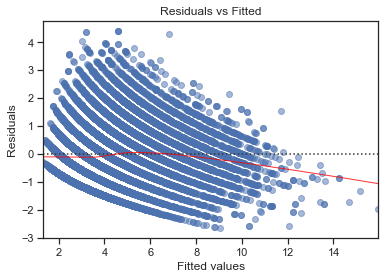

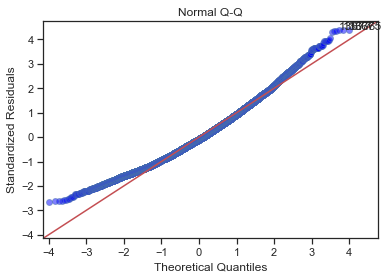

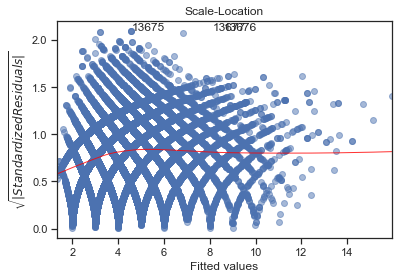

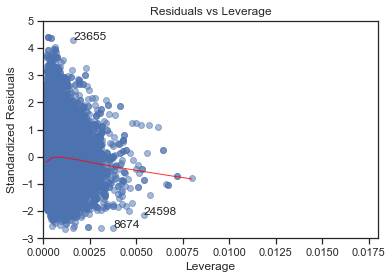

In [40]:
# Diagnostics model 0
diagnostic(model_0)

In [85]:
# NegativeBinomial with formula: ''Cheb ~ Region + Pregnant + Religion + Hhha + Age1stmar + Pregterm + Age1stbirth + Curwor + Woc + Fp + Childdesire + Kidalive + Kidtwin + Education'
ngb_model = smf.glm(formula=formula_0, data=df, family=sm.families.NegativeBinomial())
ngb_model = ngb_model.fit()
print(ngb_model.summary())
print("Chisq: ", 1 - stats.chi2.cdf(ngb_model.deviance, ngb_model.df_resid))
print("AIC: ", ngb_model.aic)
# diagnostic(ngb_model)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Cheb   No. Observations:                29897
Model:                            GLM   Df Residuals:                    29876
Model Family:        NegativeBinomial   Df Model:                           20
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -75742.
Date:                Sat, 10 Jul 2021   Deviance:                       5521.9
Time:                        17:42:00   Pearson chi2:                 5.07e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

C:\Users\ThanhCong\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\ThanhCong\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


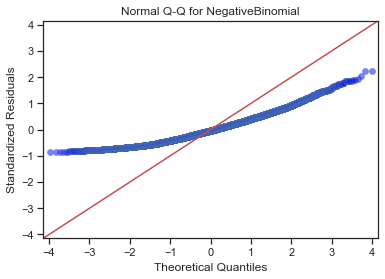

In [87]:
# Diagnostics NegativeBinomial
model_norm_residuals = ngb_model.get_influence().resid_studentized
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q for NegativeBinomial')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

***Model Negative Binomial không xử lý được over/under dispersion***